<a href="https://colab.research.google.com/github/navi004/Deep-Learning-CSE4037-/blob/main/DL_Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LSTM and GRU - Lab A-5.1
* Naveen N (22MIA1049)  

In [14]:
# Install kagglehub
!pip install -q kagglehub

# Import kagglehub
import kagglehub

# Download the latest version of the IMDB dataset
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1


In [15]:
import os

# Check the files in the path where the dataset is downloaded
print("Files in the dataset directory:")
os.listdir(path)

Files in the dataset directory:


['IMDB Dataset.csv']

In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM,GRU, Dense
from sklearn.model_selection import train_test_split

### Loading Dataset

In [17]:
data_file = os.path.join(path, 'IMDB Dataset.csv')
df = pd.read_csv(data_file)
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


### Input

In [18]:
t = Tokenizer(num_words=5000)

t.fit_on_texts(df['review'])

x = t.texts_to_sequences(df['review'])

max_length = 100

xp = pad_sequences(x, maxlen=max_length, padding = 'post')

In [19]:
xp

array([[ 954,  183,    1, ...,  125, 4103,  486],
       [  29,    1, 2294, ..., 1977,   69,  221],
       [1026,  220,  230, ...,   63,   16,  350],
       ...,
       [   9,  200,   26, ..., 1957,    2,    2],
       [  16,   47, 4834, ...,   67,  739,   42],
       [  49,   14,   47, ...,  794,   11,   17]], dtype=int32)

In [20]:
y = np.array(df['sentiment'].map({'positive' : 1, 'negative' : 0}))
y

array([1, 1, 1, ..., 0, 0, 0])

In [53]:
x_train, x_test, y_train, y_test = train_test_split(xp, y, test_size=0.2, random_state=42)

print(f"Shape of x_train : {x_train.shape}")
print(f"Shape of x_test : {x_test.shape}")

Shape of x_train : (40000, 100)
Shape of x_test : (10000, 100)


### New test record for testing

In [22]:
txt = 'The movie is so boring and the direction is bad'

txt = t.texts_to_sequences([txt])

txtP = pad_sequences(txt, maxlen=max_length, padding='post')


### RNN Model

In [60]:
rnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length = max_length),
    SimpleRNN(32, activation = 'relu'),
    Dense(1, activation='sigmoid')
])

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(x_train, y_train, epochs=5, validation_data=(x_test,y_test))

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.6301 - loss: 0.6212 - val_accuracy: 0.8261 - val_loss: 0.4114
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - accuracy: 0.8182 - loss: 0.4110 - val_accuracy: 0.7041 - val_loss: 0.5679
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 28ms/step - accuracy: 0.7922 - loss: 0.4449 - val_accuracy: 0.8466 - val_loss: 0.3654
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.8831 - loss: 0.2852 - val_accuracy: 0.8542 - val_loss: 0.3472
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.9015 - loss: 0.2510 - val_accuracy: 0.8453 - val_loss: 0.3699


### Accuracy and loss

In [61]:
loss_rnn, accuracy_rnn = rnn_model.evaluate(x_test, y_test)
print(f"Test Loss: {loss_rnn}, Test Accuracy: {accuracy_rnn}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8419 - loss: 0.3706
Test Loss: 0.36988338828086853, Test Accuracy: 0.845300018787384


### Prediction for New Test Record

In [62]:
pred_rnn = rnn_model.predict(txtP)
print(pred_rnn)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
[[0.36379907]]


In [63]:
print("Sentiment : Positive" if pred_rnn[0][0] > 0.5 else "Sentiment : Negative")

Sentiment : Negative


### LSTM Model

In [64]:
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length = max_length),
    LSTM(32, return_sequences=False),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_history = lstm_model.fit(x_train, y_train, epochs=5, validation_data=(x_test,y_test))

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 61s 47ms/step - accuracy: 0.7234 - loss: 0.5091 - val_accuracy: 0.8456 - val_loss: 0.3483
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.8780 - loss: 0.3020 - val_accuracy: 0.8584 - val_loss: 0.3267
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.9009 - loss: 0.2493 - val_accuracy: 0.8694 - val_loss: 0.3171
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - accuracy: 0.9196 - loss: 0.2111 - val_accuracy: 0.8650 - val_loss: 0.3219
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 46ms/step - accuracy: 0.9311 - loss: 0.1797 - val_accuracy: 0.8594 - val_loss: 0.3608


### Accuracy and loss

In [65]:
loss_lstm, accuracy_lstm = lstm_model.evaluate(x_test, y_test)
print(f"Test Loss: {loss_lstm}, Test Accuracy: {accuracy_lstm}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8555 - loss: 0.3663
Test Loss: 0.36079633235931396, Test Accuracy: 0.8593999743461609


### Prediction for new test Record

In [66]:
pred_lstm = lstm_model.predict(txtP)

print(pred_lstm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
[[0.12583359]]


In [67]:
print("Sentiment : Positive" if pred_lstm[0][0] > 0.5 else "Sentiment : Negative")

Sentiment : Negative


### GRU Model

In [68]:
gru_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length = max_length),
    GRU(32, return_sequences = False),
    Dense(1, activation='sigmoid')
])

gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_history = gru_model.fit(x_train, y_train, epochs=5, validation_data=(x_test,y_test))

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.7323 - loss: 0.5111 - val_accuracy: 0.8721 - val_loss: 0.3057
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.8925 - loss: 0.2665 - val_accuracy: 0.8776 - val_loss: 0.2879
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 78s 62ms/step - accuracy: 0.9206 - loss: 0.2040 - val_accuracy: 0.8745 - val_loss: 0.3022
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 63ms/step - accuracy: 0.9357 - loss: 0.1717 - val_accuracy: 0.8674 - val_loss: 0.3306
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9550 - loss: 0.1289 - val_accuracy: 0.8607 - val_loss: 0.3785


### Accuracy and loss

In [69]:
loss_gru, accuracy_gru = gru_model.evaluate(x_test, y_test)
print(f"Test Loss: {loss_gru}, Test Accuracy: {accuracy_gru}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8579 - loss: 0.3764
Test Loss: 0.37846484780311584, Test Accuracy: 0.8607000112533569


### Prediction for New Test Record

In [70]:
pred_gru = lstm_model.predict(txtP)

print(pred_gru)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[0.12583359]]


In [71]:
print("Sentiment : Positive" if pred_gru[0][0] > 0.5 else "Sentiment : Negative")

Sentiment : Negative


### Comparison of RNN, LSTM and GRU

In [75]:

print(f"RNN Test Accuracy: {accuracy_rnn}")
print(f"LSTM Test Accuracy: {accuracy_lstm}")
print(f"GRU Test Accuracy: {accuracy_gru}")

model_accuracies = {
    "RNN": accuracy_rnn,
    "LSTM": accuracy_lstm,
    "GRU": accuracy_gru
}

best_model = max(model_accuracies, key=model_accuracies.get)
print(f"\nThe best performing model is {best_model} with an accuracy of {model_accuracies[best_model]} outperforming LSTM and SimpleRNN")


RNN Test Accuracy: 0.845300018787384
LSTM Test Accuracy: 0.8593999743461609
GRU Test Accuracy: 0.8607000112533569

The best performing model is GRU with an accuracy of 0.8607000112533569 outperforming LSTM and SimpleRNN


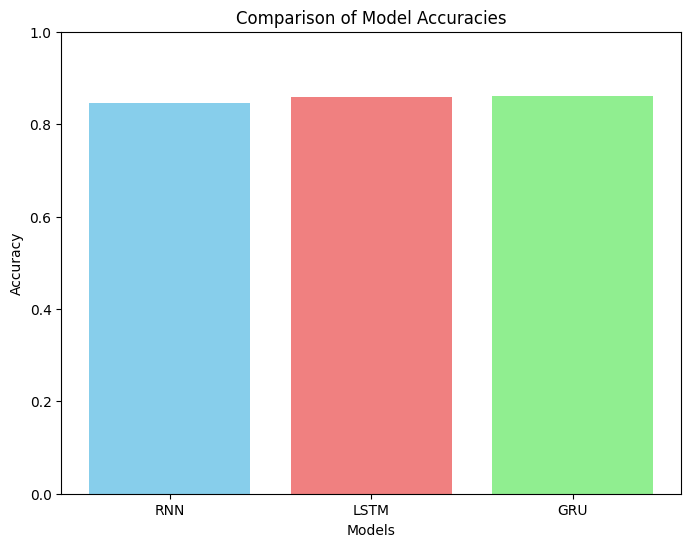

In [73]:
import matplotlib.pyplot as plt

models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)
plt.show()
